In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

With a total sample size of 10,000, we establish two normal distributions for a person's height and weight. The anticipated values of Z are 1.75 for average height and 70 for average weight.

In [19]:
total_sample = 10000
height_mean = 1.75
height_std = 0.2
weight_mean = 70
weight_std = 10

# Generate random samples
height = np.random.normal(loc=height_mean, scale=height_std, size=(total_sample))
weight = np.random.normal(loc=weight_mean, scale=weight_std, size=(total_sample))

# Combine height and weight into a 2D array
z = np.column_stack((height, weight))

expected_value_z = np.array([height_mean, weight_mean])
print("Expected Value of Z:", expected_value_z)

Expected Value of Z: [ 1.75 70.  ]


Plotting a random sample of n element

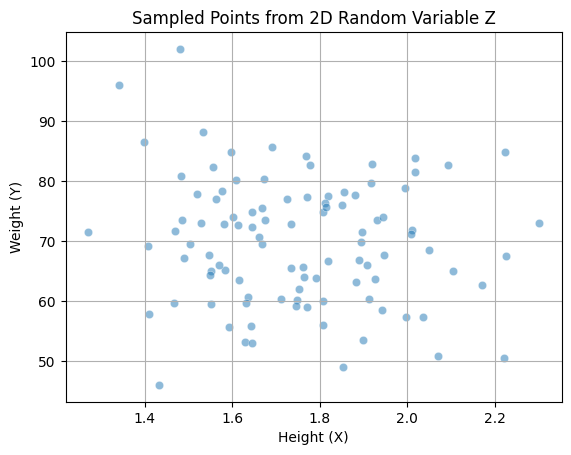

In [20]:
# Select a subset of samples for plotting
n = 100
selected_sample_idx = np.random.choice(z.shape[0], n, replace=False)
selected_sample = z[selected_sample_idx]

# Plot sampled points
sns.scatterplot(x=selected_sample[:, 0], y=selected_sample[:, 1], alpha=0.5)
plt.title('Sampled Points from 2D Random Variable Z')
plt.xlabel('Height (X)')
plt.ylabel('Weight (Y)')
plt.grid(True)
plt.show()

Then the euclidean distance between the expected value of Z and the empirical average of the first n elements (with n ranging from 1 to the entire number of samples) is calculated and plotted.

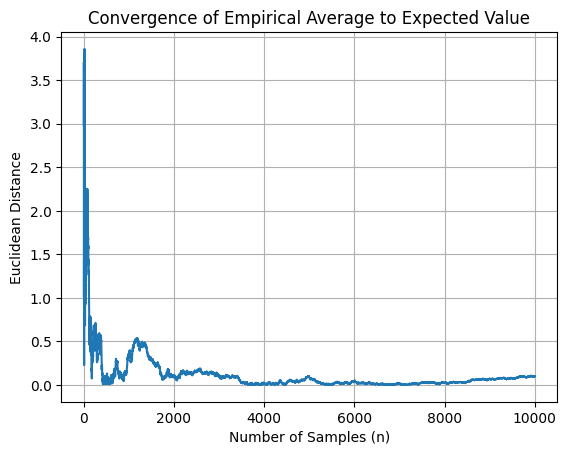

In [21]:
# Calculate and plot convergence of empirical average to expected value
euclidean_distances = np.linalg.norm(np.cumsum(z, axis=0) / np.arange(1, total_sample + 1)[:, None] - expected_value_z, axis=1)

# Create a DataFrame for better data manipulation
data = {'Number of Samples (n)': np.arange(1, total_sample + 1), 'Euclidean Distance': euclidean_distances}
df = pd.DataFrame(data)

# Plot the convergence
sns.lineplot(x='Number of Samples (n)', y='Euclidean Distance', data=df)
plt.title('Convergence of Empirical Average to Expected Value')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()
